cost 24.4


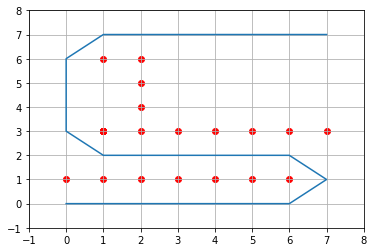

In [63]:
# https://rosettacode.org/wiki/A*_search_algorithm#Python
import matplotlib.pyplot as plt
%matplotlib inline

D = 1   # adjacent cost
D2 = 1.1 # diagonal cost

class AStarGraph(object):
    # Define a class board like grid with two barriers
 
    def __init__(self):
        self.barriers = []
        
        basic_barrier = [(2,4),(2,5),(2,6),(3,6), (4,6),(5,6),(5,5),(5,4), (5,3),(5,2),(4,2),(3,2)]
        new_barrier = [(x, 1) for x in range(7) ] + [(x, 3) for x in range(1, 8) ] + [(1, 3) for x in range(1, 8) ] \
                        + [(2, 4), (2, 5), (2, 6), (1, 6)]
        
        self.barriers.append(new_barrier)
 
    def heuristic(self, start, goal):
        # Use Chebyshev distance heuristic if we can move
        # one square either adjacent or diagonal
        dx = abs(start[0] - goal[0])
        dy = abs(start[1] - goal[1])
        # Compute the number of non-diagonal steps
        # Subtract the steps you save by using the diagonal.
        # There are min(dx, dy) diagonal steps, each one costs D2 but
        # saves 2 x D non-diagonal steps.
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
 

    def get_vertex_neighbours(self, pos):
        n = []
        # Generate vertex neighbours
        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1),(1,1),
                               (-1,1),(1,-1),(-1,-1)]:
            x2 = pos[0] + dx
            y2 = pos[1] + dy
            if x2 < 0 or x2 > 7 or y2 < 0 or y2 > 7:
                continue
            n.append((x2, y2))
        return n
    
 
    def move_cost(self, a, b):
        for barrier in self.barriers:
            if b in barrier:   # Extremely high cost 
                return 100 # to enter barrier squares
            
        if (a[0] == b[0] or a[1] == b[1]):
            return D
        else:
            return D2


def AStarSearch(start, end, graph):
    G = {} # Actual movement cost to each position from the start position
    F = {} # Estimated movement cost of start to end going via this position
 
    # Initialize starting values
    G[start] = 0 
    F[start] = graph.heuristic(start, end)
 
    closedVertices = set()
    openVertices = set([start])
    cameFrom = {}
 
    while len(openVertices) > 0:
        # Get the vertex in the open list with the lowest F score
        current = None
        currentFscore = None
        for pos in openVertices:
            if current is None or F[pos] < currentFscore:
                currentFscore = F[pos]
                current = pos
 
        # Check if we have reached the goal
        if current == end:
            #Retrace our route backward
            path = [current]
            while current in cameFrom:
                current = cameFrom[current]
                path.append(current)
            path.reverse()
            return path, F[end] #Done!
 
        # Mark the current vertex as closed
        openVertices.remove(current)
        closedVertices.add(current)
 
        # Update scores for vertices near the current position
        for neighbour in graph.get_vertex_neighbours(current):
            if neighbour in closedVertices:
                                # We have already processed this node exhaustively
                continue 
            candidateG = G[current] + \
                         graph.move_cost(current, neighbour)
 
            if neighbour not in openVertices:
                                # Discovered a new vertex
                openVertices.add(neighbour)  
            elif candidateG >= G[neighbour]:
                                # This G score is worse than previously found
                continue 
 
            #Adopt this G score
            cameFrom[neighbour] = current
            G[neighbour] = candidateG
                        # Update heuristic
            H = graph.heuristic(neighbour, end)
                        # Update cost function
            F[neighbour] = G[neighbour] + H
 
    raise RuntimeError("A* failed to find a solution")
    

def display_path(to_pt, from_pt=(0,0)):
    graph = AStarGraph()
    result, cost = AStarSearch(from_pt, to_pt, graph)
    #print ("route", result)
    print ("cost", cost)
    plt.plot([v[0] for v in result], [v[1] for v in result])
    for barrier in graph.barriers:
        plt.scatter([v[0] for v in barrier], [v[1] for v in barrier], color="r")
        plt.xlim(-1,8)
        plt.ylim(-1,8)
        plt.grid()
        plt.show()
        
display_path((7, 7))

In [64]:
from simpleai.search import CspProblem, backtrack

# Specify that neighbours should be different
def constraint_func(names, values):
    return values[0] != values[1]  

    # Specify the variables
    names = # Add the names for the regions here.

    # Specify the available colours 
    colours = # Add data structure for colours here.

    # Specify the constraints 
    constraints = # Add constraints here.

    # Solve the problem
    problem = CspProblem(names, colours, constraints)

    # Print the solution
    output = backtrack(problem)
    # Add code for printing the solution here.

SyntaxError: invalid syntax (<ipython-input-64-e725c474e6cb>, line 8)